In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('D:\internship works\codsoft\salels_advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [27]:
df.shape

(200, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [30]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [31]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.corr(numeric_only = True)#correlation matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

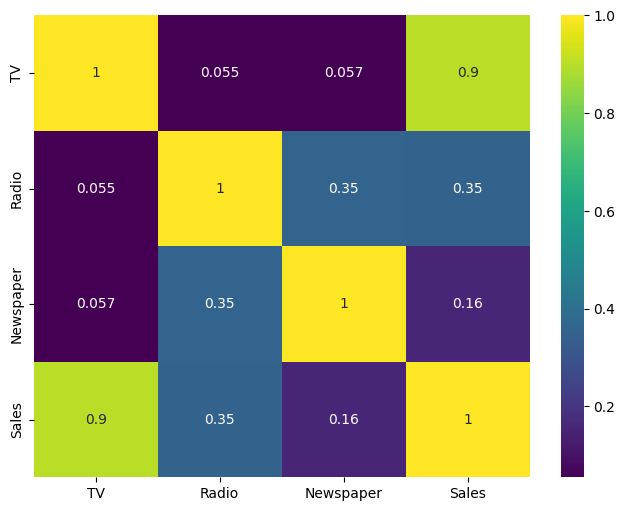

In [34]:
corr = df.corr(numeric_only=True)
fig , ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True , ax=ax , cmap ='viridis')

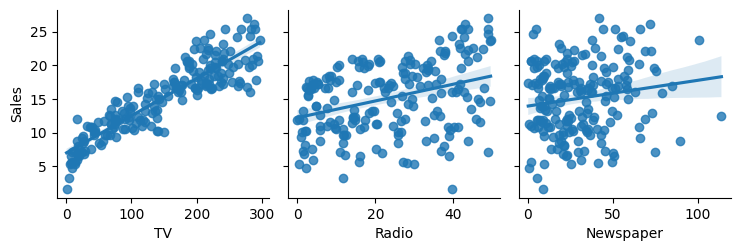

In [36]:
sns.pairplot(data= df , x_vars=["TV","Radio", "Newspaper"], y_vars="Sales",kind="reg", palette="pastel")

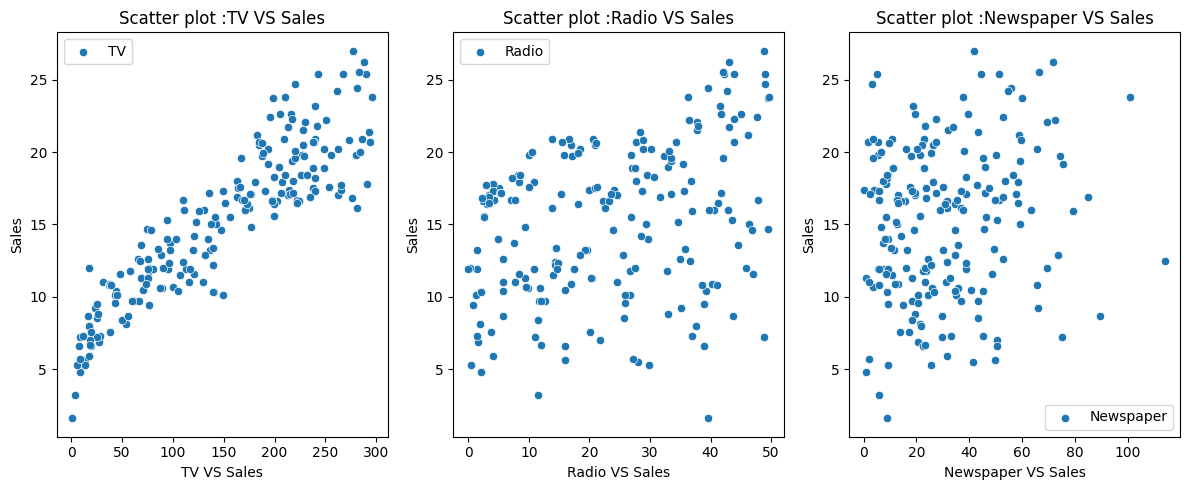

In [42]:
plt.figure(figsize=(12,5))
columns = {0: "TV",1: "Radio", 2:"Newspaper"}
for plot, col_name in columns.items():
    plt.subplot(1,3,plot+1)
    sns.scatterplot(x=df[col_name], y=df["Sales"],label= col_name , palette ="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot :{} VS Sales".format(col_name))
    plt.legend()
plt.tight_layout()
plt.show()

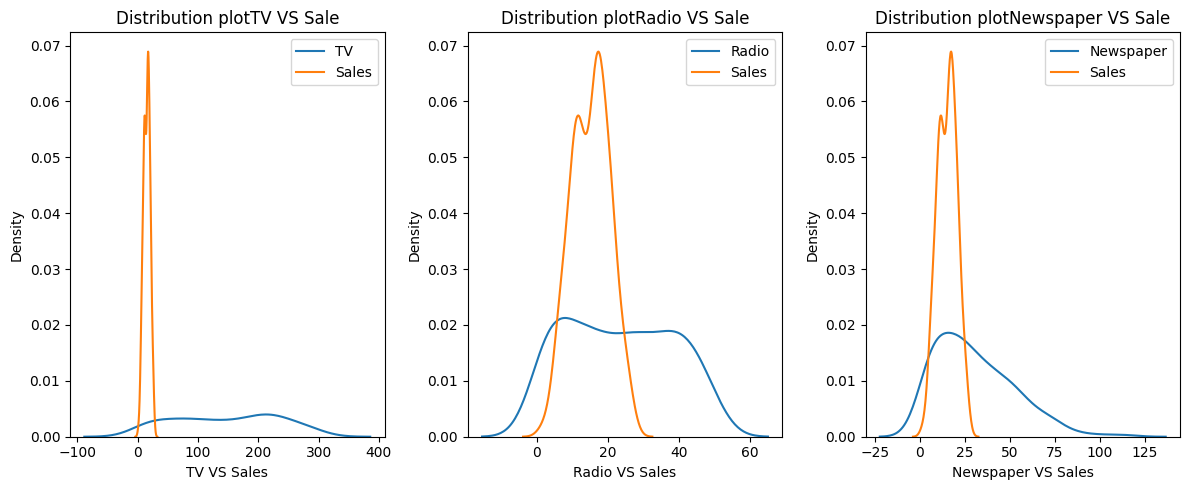

In [43]:
#distribution plot 
plt.figure(figsize=(12,5))
columns ={0: "TV",1: "Radio", 2:"Newspaper"}

for plot , col_name in columns.items():
    plt.subplot(1,3,plot+1)
    sns.distplot(x=df[col_name],hist=False,label=col_name)
    sns.distplot(x=df["Sales"],hist=False,label ="Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot{} VS Sale".format(col_name))
    plt.legend()
plt.tight_layout()
plt.show()    
    

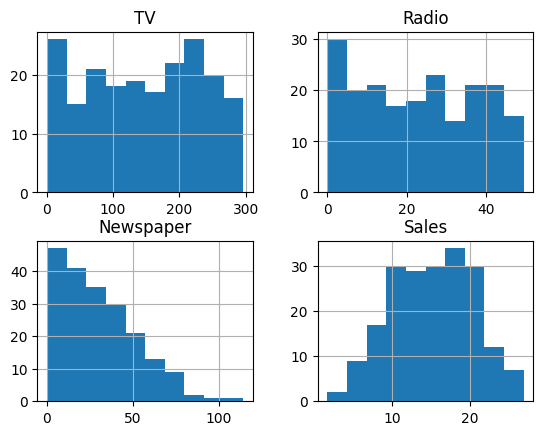

In [44]:
df.hist()
plt.show()

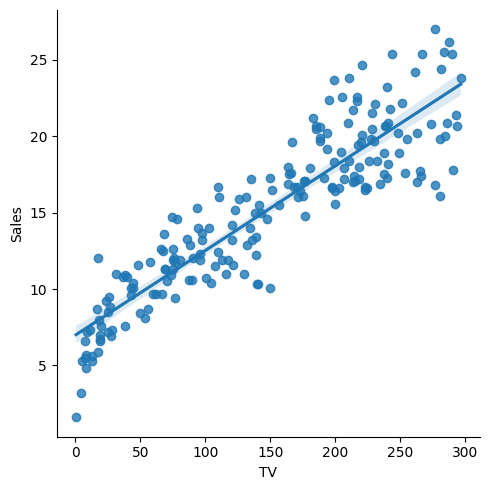

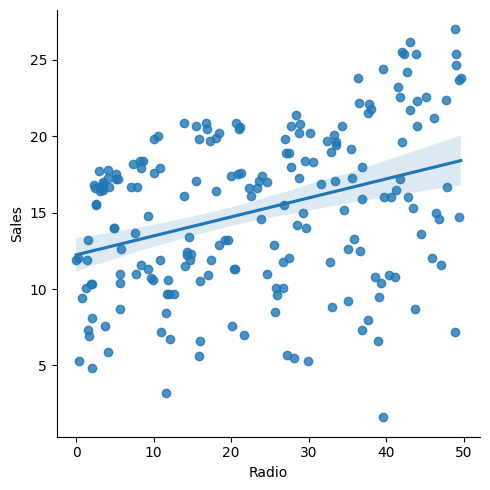

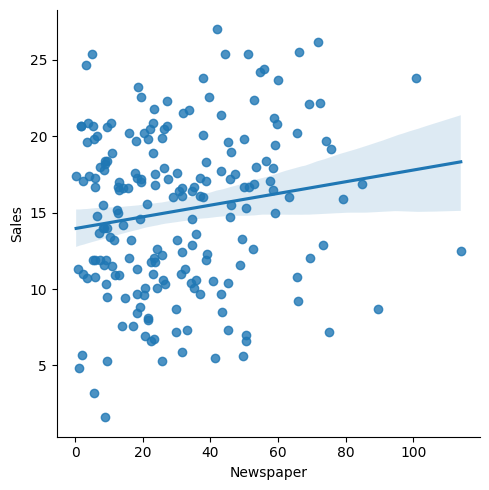

In [46]:
sns.lmplot(x='TV' , y='Sales' , data=df,height=5)
sns.lmplot(x='Radio' , y='Sales' , data=df,height=5)
sns.lmplot(x='Newspaper' , y='Sales' , data=df,height=5)

In [47]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


processing dataset and model preparation

In [48]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('Sales',axis=1)
y = df['Sales']

x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=0.2 , random_state= 42)

In [50]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

lab =LabelEncoder()
y=lab.fit_transform(y)


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

print("Accuracy (linear Regression):" , model.score(x_test , y_test)* 100)

Accuracy (linear Regression): 91.15647723992757


In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
#SAVING THE MODEL 
import joblib as jb
jb.dump(model , "sales_adv_prdict.pkl")

['sales_adv_prdict.pkl']

LinearRegression
Mean Squared Error : 2.4040674447118886
r2 Score: 0.8843686673385628
cross-Validation R2: 0.8843686673385628


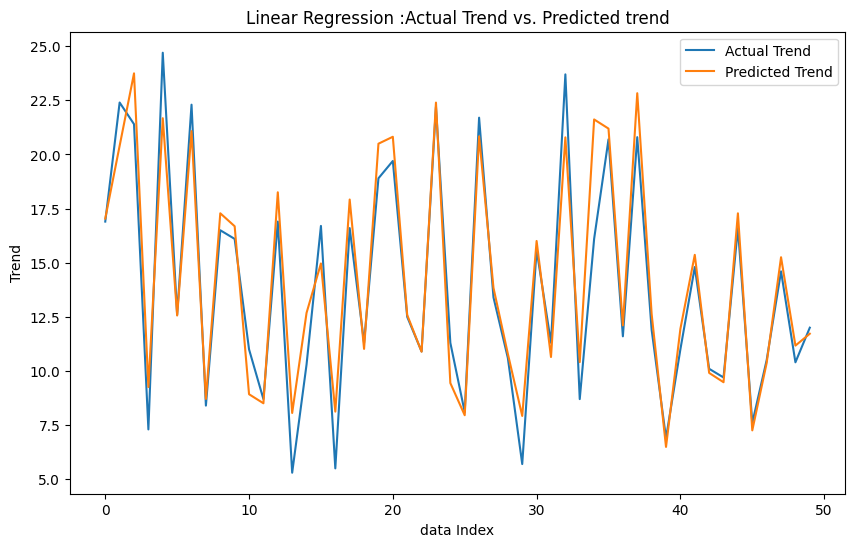

In [56]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score

model.fit(x_train, y_train)
y_pred =model.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
cv_scores = cross_val_score(model , x_train , y_train , cv =5 , scoring ='r2')
print("LinearRegression")
print("Mean Squared Error : {}".format(mse))
print("r2 Score: {}".format(cv_scores.mean()))
print("cross-Validation R2: {}".format(cv_scores.mean()))

plt.figure(figsize=(10 , 6))
plt.plot(np.arange(len(y_test)), y_test , label= 'Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred , label ='Predicted Trend')
plt.xlabel('data Index')
plt.ylabel('Trend')
plt.title(f'Linear Regression :Actual Trend vs. Predicted trend')
plt.legend()
plt.show()
print()


In [60]:
new_data = pd.DataFrame({'TV': [100], 'Radio':[50], 'Newspaper':[25]})
predicted_sales = model.predict(new_data)
print("predicted sales", predicted_sales)

predicted sales [15.29882262]
